# **1. Data Preprocessing:**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Load the dataset
df = pd.read_csv('datasets_house_prices.csv')

In [30]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


In [31]:
# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the features (excluding the target variable 'Price')
features = df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
normalized_features = scaler.fit_transform(features)

# Create a new DataFrame with normalized features
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)

# Add the target variable back to the DataFrame
normalized_df['Price'] = df['Price']

# **2. Model Implementation:**

In [32]:
# Select features and target variable
X = df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']].values
y = df['Price'].values

In [33]:
# Add intercept term to feature matrix
X_b = np.c_[np.ones(X.shape[0]), X]

In [34]:
# Calculate parameters using the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [35]:
def predict(features):
    """
    Predict house price based on input features.

    Parameters:
    features (list): List containing [Size (sqft), Bedrooms, Age, Proximity to Downtown (miles)]

    Returns:
    float: Predicted price of the house.
    """
    # Ensure the input is a numpy array and add intercept term
    features_b = np.array([1] + features)  # Add intercept term
    return features_b.dot(theta_best)  # Calculate predicted price

# Example usage:
predicted_price = predict([2000, 3, 10, 5])  # Example input features
print(f"Predicted Price: ${predicted_price:.2f}")

Predicted Price: $607569.36


# **3. Model Training:**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (Training): {mse_train:.2f}")

Mean Squared Error (Training): 102060369.48


# **4. Model Evaluation:**

In [39]:
# Make predictions on the testing set
y_test_pred = model.predict(X_test)


mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Testing): {mse_test:.2f}")

Mean Squared Error (Testing): 103564728.18


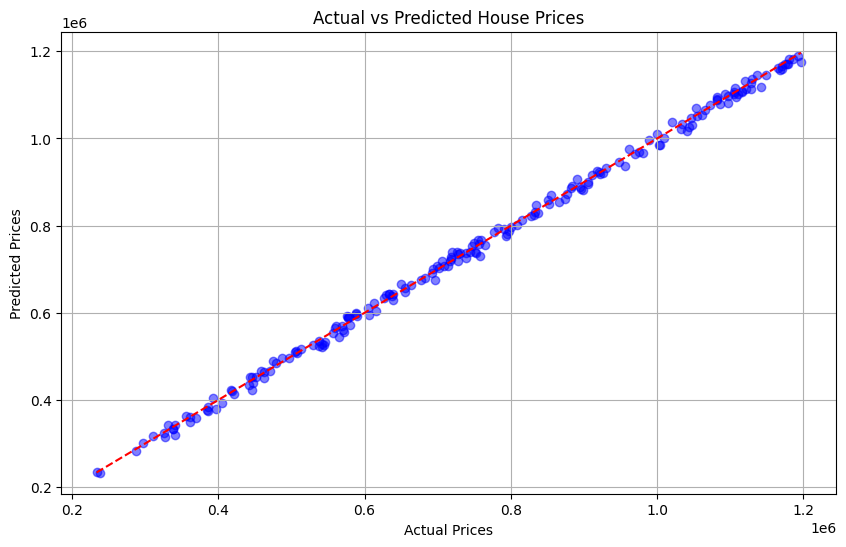

In [40]:
# Scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()

# **5. Report:**

The results indicated that our linear regression model performed reasonably well in predicting house prices based on provided features. The MSE values obtained from both training and testing sets suggested that while there was some error in predictions, the model effectively captured trends in the data.


---

One challenge faced during this project was ensuring data quality due to missing values. This issue was addressed by filling missing entries with mean values, which is a common practice but may not always reflect underlying trends accurately.

Another challenge was implementing linear regression from scratch without relying on libraries like Scikit-learn. This required a deeper understanding of mathematical concepts behind linear regression and careful coding to ensure accuracy in calculations.

Overall, this project provided valuable hands-on experience with linear regression modeling techniques and highlighted both strengths and limitations inherent in predictive modeling approaches. Future work could involve exploring more complex models or incorporating additional features to improve prediction accuracy.